In [167]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [347]:
reviews_df_raw=pd.DataFrame.from_csv('ratings_grouped_unstack.csv')
d1=pd.DataFrame.from_csv('avg_length_and_number_of_reviews_per_book.csv')

In [349]:
reviews_df_raw.head()

,1,2,3,4,5
asin,,,,,
000100039X,6,4,8,15,173
0001055178,0,4,2,10,2
0001473123,1,0,0,2,13
0001473727,0,0,0,0,7
0001473905,0,0,1,0,5


In this dataset, asin is the Amazon identifier for the book, and the column named 1 (respectively 2, 3, 4 and 5) corresponds to how many reviews were associated with a rating of 1 star (respectively 2, 3, 4 and 5 stars) (every time someone reviews a book they need to rate the book from 1 star to 5). 

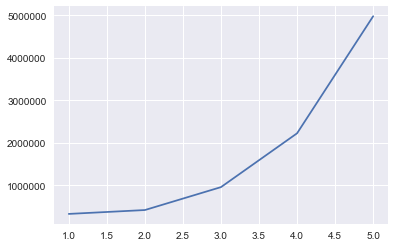

In [350]:
x = reviews_df_raw.columns
y = reviews_df_raw.sum()

g=plt.plot(x,y)
#g.fig.set_figwidth(20).set_figheight(30)

Strangely, there are way less 1 star reviews than 5 stars reviews... We need to understand whether this is just a matter of fact (people review a book more often to say they liked it then to complain about it) or if there is some other explanation for this graph. Maybe Amazon somehow moderates negative reviews to make sure that the books they sell don't get too unpopular.  

In [365]:
reviews_df_raw.describe()

,1,2,3,4,5
count,367982.000000,367982.000000,367982.000000,367982.000000,367982.000000
mean,0.880024,1.128071,2.595749,6.041312,13.535485
std,4.809409,4.139157,7.780360,16.193202,39.736241
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,4.000000
50%,0.000000,0.000000,1.000000,3.000000,6.000000
75%,1.000000,1.000000,3.000000,6.000000,12.000000
max,1565.000000,640.000000,1209.000000,2065.000000,4839.000000


#### try to find "good books" , "bad books", "controversial books"
* "good book"= many high ratings hew low ratings 
* "bad book" = many low ratings few high ratings  
* "controversial book" = any kind of ratings with small variance between number of reviews with 1,2,3,4 or 5 stars 



In [366]:
d1['asin']=d1.index
reviews_df_raw['asin']=reviews_df_raw.index
reviews_df_tot=pd.merge(reviews_df_raw, d1, on=['asin'])
reviews_df_tot['bad_ratio']= (reviews_df_tot['1']+reviews_df_tot['2'])/(reviews_df_tot['1']+reviews_df_tot['2']+reviews_df_tot['3']+reviews_df_tot['4']+reviews_df_tot['5'])
reviews_df_tot['good_ratio']= (reviews_df_tot['4']+reviews_df_tot['5'])/(reviews_df_tot['1']+reviews_df_tot['2']+reviews_df_tot['3']+reviews_df_tot['4']+reviews_df_tot['5'])


reviews_df_tot.head()

,1,2,3,4,5,asin,Avg_len,number_of_reviews,bad_ratio,good_ratio
0,6,4,8,15,173,000100039X,638.033981,206,0.048544,0.912621
1,0,4,2,10,2,0001055178,1308.611111,18,0.222222,0.666667
2,1,0,0,2,13,0001473123,287.937500,16,0.062500,0.937500
3,0,0,0,0,7,0001473727,187.571429,7,0.000000,1.000000
4,0,0,1,0,5,0001473905,481.833333,6,0.000000,0.833333


For our analysis to make sense, we need to take books that have a significative number of reviews as if the book only has one or two reviews that is negative/positive, the book will be directly classified as a bad/good book and this is not reliable. However, if we take a minimum too high for the number of reviews of a book, we will have very few "bad books" as, we will see that the bulk of bad books have very few comments. 

We will try with a limit of 10 reviews. 

In [367]:
reviews_df = reviews_df_tot.copy()[reviews_df_tot.number_of_reviews>10]

In [373]:
#we will compare how many bad books we have if we consider the all dataset and if we consider only the books that have more than 10 reviews (for reliability)
bad_books_tot = reviews_df_tot[reviews_df_tot.bad_ratio>0.7]
bad_books = reviews_df[reviews_df.bad_ratio>0.7]

#As we have already a significant number of good and controversial books with our limit, we just consider with the limit 
good_books = reviews_df[reviews_df.good_ratio>0.7]
controversial_books= reviews_df[abs(reviews_df.good_ratio-reviews_df.bad_ratio)<0.1]



In [369]:
bad_books_tot.describe()

,1,2,3,4,5,Avg_len,number_of_reviews,bad_ratio,good_ratio
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,5.973291,1.967949,0.591880,0.475427,0.849359,852.246335,9.857906,0.816833,0.123201
std,16.132484,2.010411,1.105213,0.930433,4.037758,577.108054,21.163739,0.085686,0.095057
min,0.000000,0.000000,0.000000,0.000000,0.000000,116.666667,5.000000,0.704545,0.000000
25%,3.000000,1.000000,0.000000,0.000000,0.000000,449.900000,5.000000,0.750000,0.000000
50%,4.000000,2.000000,0.000000,0.000000,0.000000,710.778333,7.000000,0.800000,0.142857
75%,6.000000,3.000000,1.000000,1.000000,1.000000,1128.700000,9.000000,0.843117,0.200000
max,447.000000,20.000000,14.000000,12.000000,119.000000,6498.200000,582.000000,1.000000,0.294118


In [370]:
bad_books.describe()

,1,2,3,4,5,Avg_len,number_of_reviews,bad_ratio,good_ratio
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,15.794595,3.372973,1.502703,1.140541,2.405405,842.318764,24.216216,0.796491,0.134620
std,34.482998,3.216183,1.981228,1.671933,8.847929,440.475755,44.836257,0.077958,0.076236
min,2.000000,0.000000,0.000000,0.000000,0.000000,147.909091,11.000000,0.704545,0.000000
25%,7.000000,1.000000,0.000000,0.000000,0.000000,539.714286,12.000000,0.733333,0.076923
50%,10.000000,3.000000,1.000000,1.000000,1.000000,768.315789,15.000000,0.777070,0.138889
75%,16.000000,5.000000,2.000000,2.000000,2.000000,1090.764706,21.000000,0.833333,0.187500
max,447.000000,20.000000,14.000000,12.000000,119.000000,2494.909091,582.000000,1.000000,0.294118


As we said before, the number of 'bad books' depends a lot on the limit we take for the minimum number of reviews of our dataset. This might be due to the fact that when books have some bad comments, the books popularity drops and people stop reviewing them very fast. 

In [321]:
good_books.describe()

,1,2,3,4,5,Avg_len,number_of_reviews,bad_ratio,good_ratio
count,142711.000000,142711.000000,142711.000000,142711.000000,142711.000000,142711.000000,142711.000000,142711.000000,142711.000000
mean,0.954432,1.410024,3.788601,10.963324,26.448417,847.175892,43.564799,0.049209,0.870685
std,3.312660,3.970387,9.158551,22.480132,59.200941,491.345135,92.935312,0.053780,0.084861
min,0.000000,0.000000,0.000000,0.000000,0.000000,121.909091,11.000000,0.000000,0.700315
25%,0.000000,0.000000,1.000000,3.000000,9.000000,464.714286,14.000000,0.000000,0.806452
50%,0.000000,0.000000,2.000000,6.000000,13.000000,749.948718,22.000000,0.038462,0.875000
75%,1.000000,1.000000,4.000000,11.000000,25.000000,1117.581144,40.000000,0.080000,0.934783
max,229.000000,298.000000,607.000000,1271.000000,4839.000000,5850.666667,6717.000000,0.296296,1.000000


In [322]:
controversial_books.describe()

,1,2,3,4,5,Avg_len,number_of_reviews,bad_ratio,good_ratio
count,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000
mean,6.190747,5.680783,6.414591,5.698221,6.730961,972.133560,30.715302,0.385675,0.402699
std,12.073168,10.577229,11.582232,12.215638,13.130457,554.989698,57.239637,0.066117,0.063787
min,0.000000,0.000000,0.000000,0.000000,0.000000,136.357143,11.000000,0.090909,0.153846
25%,2.000000,2.000000,2.000000,2.000000,3.000000,553.401786,13.000000,0.347826,0.363636
50%,4.000000,4.000000,4.000000,3.000000,4.000000,908.617908,17.000000,0.384615,0.406250
75%,6.000000,6.000000,7.000000,6.000000,7.000000,1270.751786,30.000000,0.428571,0.454545
max,359.000000,373.000000,397.000000,464.000000,457.000000,4822.833333,2050.000000,0.545455,0.548387


We can already notice that there are way less "bad books" according to our definition and it is very dependent of the limit that we impose for the minimum reviews taken into account in our dataset. This needs to be analysed further. 

As there are many outliers in our dataset, we will plot only robust variables. The first function defined below plots boxplots with outliers and the second one without the outliers. 

In [377]:
def plot_categories(column):
    # Create a figure with 2 subplots and set the title
    fig, ax = plt.subplots(figsize=(15,12), ncols=1, nrows=3)
    plt.suptitle("Boxplots of "+ column + " for three categories of books", fontsize=18)


    # Adjust the sub plots parameters
    hspace =  0.5   

    plt.subplots_adjust(
      hspace  =  hspace
    )


    # Set a title to each graph
    ax[0].set_title("Bad books", fontsize=15)
    ax[1].set_title("Good books", fontsize=15)
    ax[2].set_title("Controversial Books", fontsize=15)

    # Plot the data

    sns.boxplot( bad_books[column], ax=ax[0])
    sns.boxplot( good_books[column], ax= ax[1])
    sns.boxplot( controversial_books[column], ax=ax[2])

    plt.show()

In [378]:
def plot_categories_no_outliers(column):
    # Create a figure with 2 subplots and set the title
    fig, ax = plt.subplots(figsize=(15,12), ncols=1, nrows=3)
    plt.suptitle("Boxplots of "+ column + " for three categories of books", fontsize=18)


    # Adjust the sub plots parameters
    hspace =  0.5   

    plt.subplots_adjust(
      hspace  =  hspace
    )


    # Set a title to each graph
    ax[0].set_title("Bad books", fontsize=15)
    ax[1].set_title("Good books", fontsize=15)
    ax[2].set_title("Controversial Books", fontsize=15)

    # Plot the data

    sns.boxplot( bad_books[column], ax=ax[0], showfliers=False)
    sns.boxplot( good_books[column], ax= ax[1], showfliers=False)
    sns.boxplot( controversial_books[column], ax=ax[2], showfliers=False)

    plt.show()

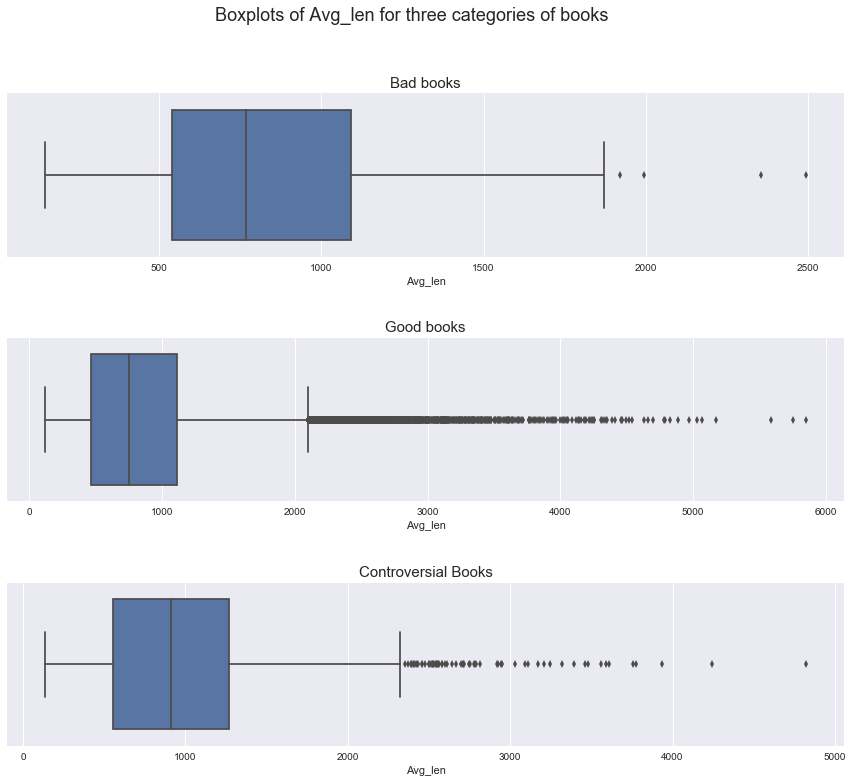

In [380]:
plot_categories('Avg_len')

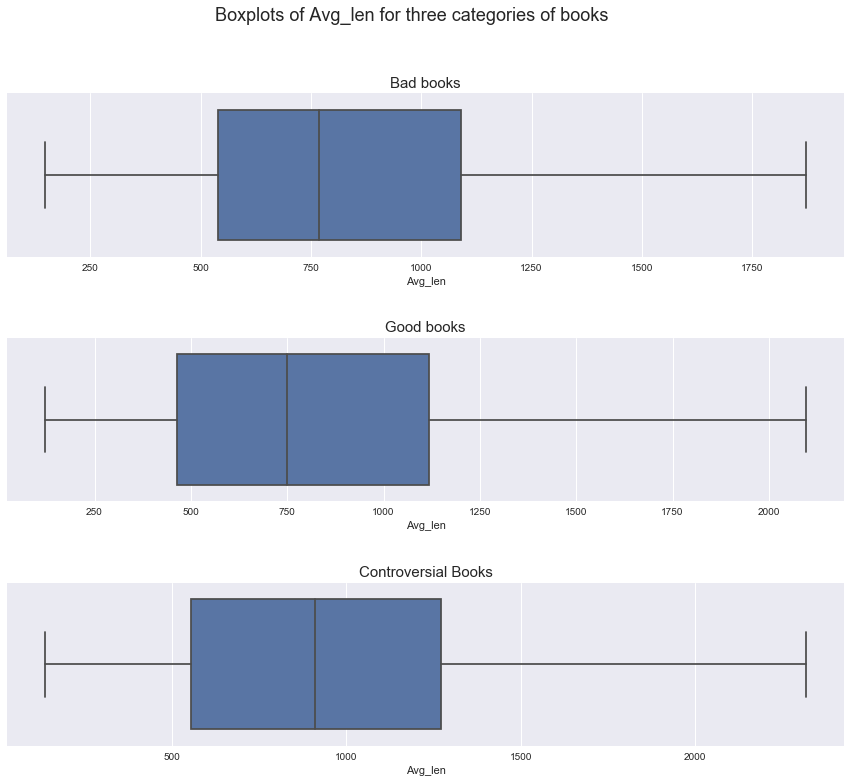

In [381]:
plot_categories_no_outliers('Avg_len')

The average length of the reviews is pretty well balanced through the groups. However, there are way more outliers (longer reviews) in the "good books" and "controversial books" than in the "bad books". The median for controversial books also seems to be a bit higher than for the two other categories. This could be explained by the fact that when people don't agree with each other they are more willing to write longer comments to explain their point of view. 

This analysis must be completed by adding 'time' in the equation as, this way, we will be able to answer more questions and go deeper in our conclusions. 